<a href="https://colab.research.google.com/github/ohazem1/Data-Science-Projects/blob/main/Classification_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Omar Hazem 

ID: 49-0581

Tutorial: t5

---

Name: Ahmed Tarek

ID: 49-4345

Tutorial: t5

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/telecom_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

using .info() to investigate for the data type we have noticed that total chargers and monthly chargers apear to be float numbers but they have object datatype this case will be handled later on in the next section

In [ ]:
# Investigation of the columns datatypes to check for any wrong datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [ ]:
# showing a statistical overview for the data 
pd.set_option("display.float_format", "{:.2f}".format)
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,6976,7032,7032.00,7032,7032,7032.00,7032,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032,7032,6180,7032
unique,6976,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,1584,5783,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$20.05/m,$20.2,No
freq,1,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,...,3094,3472,2809,2781,3875,4168,2365,61,8,5163
mean,NaN,NaN,0.16,NaN,NaN,32.42,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.37,NaN,NaN,24.55,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.00,NaN,NaN,1.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.00,NaN,NaN,9.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.00,NaN,NaN,29.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,0.00,NaN,NaN,55.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# viewing a larger part of the dataset to understand more the exsistance of some columns 
df.tail(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7002,1685-BQULA,Female,0,No,No,40,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),$93.4/m,$3756.4,No
7003,9053-EJUNL,Male,0,No,No,41,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,$89.2/m,$3645.75,No
7004,0666-UXTJO,Male,1,Yes,No,34,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),$85.2/m,$2874.45,No
7005,1471-GIQKQ,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,$49.95/m,$49.95,No
7006,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),$20.65/m,NaN,No
7007,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,$70.65/m,NaN,Yes
7008,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,$20.15/m,$826,No
7009,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,$19.2/m,$239,No
7010,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,$59.8/m,$727.8,Yes
7011,7203-OYKCT,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,$104.95/m,$7544.3,No


we found that customer id and total chargers has missing (null) values that we will handel in the data cleaning

In [ ]:
#counting the null values in a data frame 
df.isna().sum()

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

In [ ]:
# counting the total number of records in cusomer id for understanding 
df['customerID'].count()

6976

In [ ]:
# counting the total number of records in total chargers for understanding 
df['TotalCharges'].count()

6180

In [ ]:
# counting the unique values 
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

customerID: Number of unique values 6976
gender: Number of unique values 2
SeniorCitizen: Number of unique values 2
Partner: Number of unique values 2
Dependents: Number of unique values 2
tenure: Number of unique values 72
PhoneService: Number of unique values 2
MultipleLines: Number of unique values 3
InternetService: Number of unique values 3
OnlineSecurity: Number of unique values 3
OnlineBackup: Number of unique values 3
DeviceProtection: Number of unique values 3
TechSupport: Number of unique values 3
StreamingTV: Number of unique values 3
StreamingMovies: Number of unique values 3
Contract: Number of unique values 3
PaperlessBilling: Number of unique values 2
PaymentMethod: Number of unique values 4
MonthlyCharges: Number of unique values 1584
TotalCharges: Number of unique values 5783
Churn: Number of unique values 2


In [ ]:
# trying to view the unique categories in each column for better understanding 
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transf

In [ ]:
# checking the data for imbalances that will be needed later on for the model  
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [ ]:
# checking the propotionality a balanced dataset 
df['Churn'].value_counts() / df['Churn'].count()

No    0.73
Yes   0.27
Name: Churn, dtype: float64

## Data Cleaning

we removed the customer id for two main reasons the first and the main one as we are not going to use it in the model as logically it is not related to churn also it has missing values the missihng values are less than 5% so we can remove them but we will drop all the column as we are not going to use it in the modeling 

In [ ]:
# removing the customer id 
df.drop('customerID', axis="columns", inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# removing the dollar signs and the 'm' from the monthly charges and total charges to apply consistincy and to change the datatype later 
df['MonthlyCharges'] = df['MonthlyCharges'].replace({'\$':""},regex=True)
df['TotalCharges'] = df['TotalCharges'].replace({'\$':""},regex=True)
df['MonthlyCharges']=df['MonthlyCharges'].replace({'m':""},regex=True)
df['MonthlyCharges']=df['MonthlyCharges'].replace({'/':""},regex=True)
df[['TotalCharges','MonthlyCharges']].head()

,TotalCharges,MonthlyCharges
0,29.85,29.85
1,1889.50,56.95
2,108.15,53.85
3,1840.75,42.30
4,151.65,70.70


In [ ]:
# changing the datatypes of monthly charges and total charges to float for applying consistency and for imputing the missing monthly chargers later
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


you can visualize the change by looking at record number 7026 it was empty now it is imputated 

In [ ]:
# imputing the missing values in the total charges column by calculating it from the tenure * monthly charges and replacing the null values by the result
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges']*df['tenure'])
df.tail(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7026,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1522.80,No
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7031,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [ ]:
# checking for any nulls value after cleaning
df['TotalCharges'].isna().sum()

0

In [ ]:
# rechecking
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

applying label encoding to be able to use the corr function

In [ ]:
# label encoding so we can use the corr function to get the correlation 
from sklearn import preprocessing

dfcorr = df.copy()

label_encoder = preprocessing.LabelEncoder()
dfcorr['Churn']= label_encoder.fit_transform(dfcorr['Churn'])
dfcorr['gender']= label_encoder.fit_transform(dfcorr['gender'])
dfcorr['Partner']= label_encoder.fit_transform(dfcorr['Partner'])
dfcorr['Dependents']= label_encoder.fit_transform(dfcorr['Dependents'])
dfcorr['PhoneService']= label_encoder.fit_transform(dfcorr['PhoneService'])
dfcorr['MultipleLines']= label_encoder.fit_transform(dfcorr['MultipleLines'])
dfcorr['InternetService']= label_encoder.fit_transform(dfcorr['InternetService'])
dfcorr['OnlineSecurity']= label_encoder.fit_transform(dfcorr['OnlineSecurity'])
dfcorr['OnlineBackup']= label_encoder.fit_transform(dfcorr['OnlineBackup'])
dfcorr['DeviceProtection']= label_encoder.fit_transform(dfcorr['DeviceProtection'])
dfcorr['TechSupport']= label_encoder.fit_transform(dfcorr['TechSupport'])
dfcorr['StreamingTV']= label_encoder.fit_transform(dfcorr['StreamingTV'])
dfcorr['StreamingMovies']= label_encoder.fit_transform(dfcorr['StreamingMovies'])
dfcorr['StreamingTV']= label_encoder.fit_transform(dfcorr['StreamingTV'])
dfcorr['Contract']= label_encoder.fit_transform(dfcorr['Contract'])
dfcorr['PaperlessBilling']= label_encoder.fit_transform(dfcorr['PaperlessBilling'])
dfcorr['PaymentMethod']= label_encoder.fit_transform(dfcorr['PaymentMethod'])

dfcorr.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
# calculating the correlation 
corr = dfcorr.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.00,-0.00,-0.00,0.01,0.01,-0.01,-0.01,-0.00,-0.01,-0.01,0.00,-0.01,-0.01,-0.01,0.00,-0.01,0.02,-0.01,0.00,-0.01
SeniorCitizen,-0.00,1.00,0.02,-0.21,0.02,0.01,0.15,-0.03,-0.13,-0.01,-0.02,-0.15,0.03,0.05,-0.14,0.16,-0.04,0.22,0.10,0.15
Partner,-0.00,0.02,1.00,0.45,0.38,0.02,0.14,0.00,0.15,0.15,0.17,0.13,0.14,0.13,0.29,-0.01,-0.16,0.10,0.32,-0.15
Dependents,0.01,-0.21,0.45,1.00,0.16,-0.00,-0.02,0.04,0.15,0.09,0.08,0.13,0.05,0.02,0.24,-0.11,-0.04,-0.11,0.06,-0.16
tenure,0.01,0.02,0.38,0.16,1.00,0.01,0.34,-0.03,0.33,0.37,0.37,0.32,0.29,0.30,0.68,0.00,-0.37,0.25,0.83,-0.35
PhoneService,-0.01,0.01,0.02,-0.00,0.01,1.00,-0.02,0.39,-0.01,0.02,0.00,-0.02,0.06,0.04,0.00,0.02,-0.01,0.25,0.11,0.01
MultipleLines,-0.01,0.15,0.14,-0.02,0.34,-0.02,1.00,-0.11,0.01,0.12,0.12,0.01,0.18,0.18,0.11,0.17,-0.18,0.43,0.45,0.04
InternetService,-0.00,-0.03,0.00,0.04,-0.03,0.39,-0.11,1.00,-0.03,0.04,0.05,-0.03,0.11,0.10,0.10,-0.14,0.08,-0.32,-0.18,-0.05
OnlineSecurity,-0.01,-0.13,0.15,0.15,0.33,-0.01,0.01,-0.03,1.00,0.18,0.18,0.28,0.04,0.06,0.37,-0.16,-0.10,-0.05,0.25,-0.29
OnlineBackup,-0.01,-0.01,0.15,0.09,0.37,0.02,0.12,0.04,0.18,1.00,0.19,0.20,0.15,0.14,0.28,-0.01,-0.13,0.12,0.38,-0.20


In [ ]:
#sorting the corelation results descendingly for a better view and understanding 
corr['Churn'].sort_values(ascending=False, key=lambda x: x.abs())

Churn               1.00
Contract           -0.40
tenure             -0.35
OnlineSecurity     -0.29
TechSupport        -0.28
TotalCharges       -0.20
OnlineBackup       -0.20
MonthlyCharges      0.19
PaperlessBilling    0.19
DeviceProtection   -0.18
Dependents         -0.16
SeniorCitizen       0.15
Partner            -0.15
PaymentMethod       0.11
InternetService    -0.05
StreamingMovies    -0.04
MultipleLines       0.04
StreamingTV        -0.04
PhoneService        0.01
gender             -0.01
Name: Churn, dtype: float64

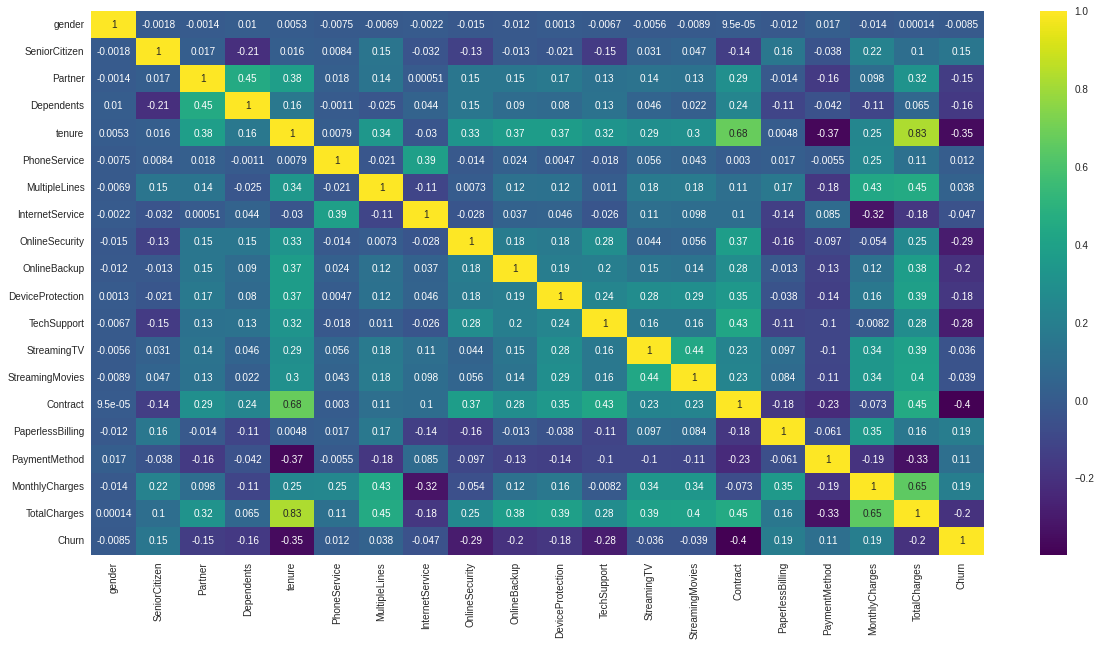

In [ ]:
# visualising the correlation using heat map
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='viridis', annot = True)


**Answer for Q1**: the highest correlated attributes with the customer churn are  contract, tenure, online security are the highest correlated attributes to churn as they all have the strongest degree of 0.40, 0.35, 0.29 moreover they are  negatively  corrrelated thus when they decrease the churn will decrease and vice versa 

**Q2: Which payment method has the highest churn rate?**

**Visualization**

In [ ]:
# calculating the percantage as the question states rate  
df_percent = pd.crosstab(df.PaymentMethod,df.Churn, normalize = 'index').rename_axis(None)
 
# Multiply all percentages by 100 for graphing. 
df_percent *= 100

df_percent.head()

Churn,No,Yes
Bank transfer (automatic),83.27,16.73
Credit card (automatic),84.75,15.25
Electronic check,54.71,45.29
Mailed check,80.80,19.20


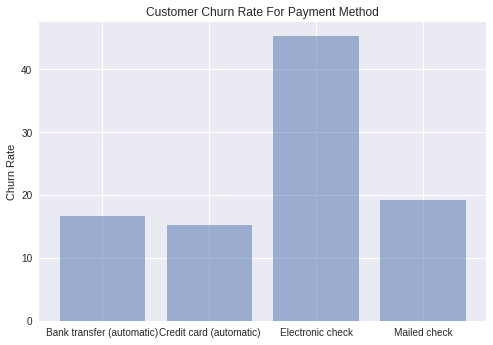

In [ ]:
# ploting a bar chart for visualizing  
plt.bar(df_percent.index, df_percent.Yes, align='center', alpha=0.5)
plt.ylabel('Churn Rate')
plt.title('Customer Churn Rate For Payment Method')

plt.show()

**Answer for Q2**: As shown above the electronic check payment method has the highest customer churn rate

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

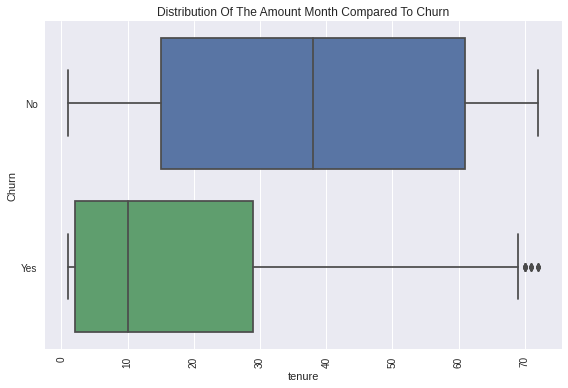

In [ ]:
#box plot
a = sns.boxplot(data=df, y="Churn", x="tenure", ).set(title="Distribution Of The Amount Month Compared To Churn")
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q3**: Your answer here

## Data Preparation for Modelling

In [ ]:
# one hot encoding for the columns to be ready for the model 
categorical_columns = ['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService'
                        ,'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',	
                         'DeviceProtection',	'TechSupport'	,'StreamingTV','StreamingMovies',
                          'Contract','PaperlessBilling','PaymentMethod',	'MonthlyCharges','TotalCharges','Churn']
                          
                          
df_encoded = pd.get_dummies(data=df, columns=categorical_columns)

df_encoded.head()

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,tenure_1,tenure_2,...,TotalCharges_8477.7,TotalCharges_8529.5,TotalCharges_8543.25,TotalCharges_8547.15,TotalCharges_8564.75,TotalCharges_8594.4,TotalCharges_8672.45,TotalCharges_8684.8,Churn_No,Churn_Yes
0,1,0,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# removing the columns with bolean values as they already exsist and we dont need them 
df_encoded.drop(['gender_Female', 'Churn_No','Partner_No','SeniorCitizen_0','Dependents_No'], axis='columns', inplace=True)
df_encoded.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,...,TotalCharges_8477.6,TotalCharges_8477.7,TotalCharges_8529.5,TotalCharges_8543.25,TotalCharges_8547.15,TotalCharges_8564.75,TotalCharges_8594.4,TotalCharges_8672.45,TotalCharges_8684.8,Churn_Yes
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Modelling

In [ ]:
# spliting the data to train and test 
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# applying the model
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Tree Visualization

the spliting criterion is Gini

starting from the parent node and going to the right 
if the contract moth less than or equal 0.5 = false 
and the internetservice fiberoptic is = false
 and the tenure is < or equal 0.5 is false 
 and the monthly charges is less than or equal 0.5 is false 
 then churn is no thus this means the customer will not churn


In [ ]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True) 
graph = graphviz.Source(dot_data)
graph

## Evaluation

Using confusion  metrics 

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


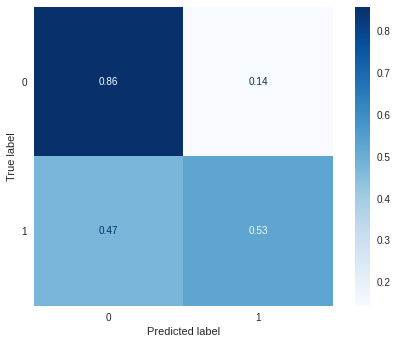

In [ ]:
# using a confusion metrics for evaluation 
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree_clf, X_test, y_test, cmap='Blues', normalize='true')
plt.grid(False)

In [ ]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.86%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    1.00    1.00      1.00       1.00          1.00
recall       1.00    1.00      1.00       1.00          1.00
f1-score     1.00    1.00      1.00       1.00          1.00
support   3614.00 1308.00      1.00    4922.00       4922.00
_______________________________________________
Confusion Matrix: 
 [[3613    1]
 [   6 1302]]

Test Result:
Accuracy Score: 76.97%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.83   0.57      0.77       0.70          0.76
recall       0.86   0.53      0.77       0.69          0.77
f1-score     0.85   0.55      0.77       0.70          0.77
support   1549.00 561.00      0.77    2110.00       2110.00
_______________________________________________
Confusion Matrix: 
 [[1328  221]
 [ 

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

pred = tree_clf.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.5725338491295938
Recall:  0.5276292335115864
F1_score:  0.5491651205936919


Evaluating the model: 

note : the f1 is combinaton of both the recall and precision so we choose to comment on the three not only one 

for the evaluation we choose to comment on all the three calculations ( precision, recall, F1 score) as the data is considered imbalanced in terms of classes as the case here is focusing only on the customer churn (churn = yes) so we are intreasted only in (churn=yes). 
we commented also on the f1 score as it calculates a a harmonic mean of both 

1.   Generly applying the model on the test results had shown an accuracy score of 76.97% which i think is within the acceptable range and no overfiting

2.   as F1 score calculates a harmonic mean of both precision and recall and had shown a result of 0.54 which can be considered a good balanced one not very low or very high as the closer to one the better 

3. also the same for precision which states 'of all predicted as positive cases, how many are really positive' its 0.57 which is also a balnced value not very high or low. 

4. since the recall score is 'of all predicted as positive cases, how many are really positive' it is 0.52 which is also not very high or low it is balanced 

5.   the scores mentioned above showed an accepted values thus i think the model can be considered as an accepted one 






## Bonus (Optional)